In [1]:
#######################
###Loading Libraries###
#######################

import numpy as np
import math
import xgboost as xgb


In [2]:
######################
###Dataset Creation###
######################

##Loading dataset
d1 = np.load('aircraft.npy')
d2 = np.load('axe.npy')
d3 = np.load('bed.npy')
d4 = np.load('bicycle.npy')
d5 = np.load('butterfly.npy')
d6 = np.load('envelope.npy')
d7 = np.load('knife.npy')
d8 = np.load('square.npy')
d9 = np.load('star.npy')
d0 = np.load('donut.npy')


##Training dataset
train = []
train_data1 = d1[1:math.floor(d1.shape[0]*0.75)]
train_data2 = d2[1:math.floor(d2.shape[0]*0.75)]
train_data3 = d3[1:math.floor(d3.shape[0]*0.75)]
train_data4 = d4[1:math.floor(d4.shape[0]*0.75)]
train_data5 = d5[1:math.floor(d5.shape[0]*0.75)]
train_data6 = d6[1:math.floor(d6.shape[0]*0.75)]
train_data7 = d7[1:math.floor(d7.shape[0]*0.75)]
train_data8 = d8[1:math.floor(d8.shape[0]*0.75)]
train_data9 = d9[1:math.floor(d9.shape[0]*0.75)]
train_data0 = d0[1:math.floor(d0.shape[0]*0.75)]

train = np.append(train_data1,train_data2,axis=0)
train = np.append(train,train_data3,axis=0)
train = np.append(train,train_data4,axis=0)
train = np.append(train,train_data5,axis=0)
train = np.append(train,train_data6,axis=0)
train = np.append(train,train_data7,axis=0)
train = np.append(train,train_data8,axis=0)
train = np.append(train,train_data9,axis=0)
train = np.append(train,train_data0,axis=0)



##Testing dataset
test = []
test_data1 = d1[math.floor(d1.shape[0]*0.75):d1.shape[0]]
test_data2 = d2[math.floor(d2.shape[0]*0.75):d2.shape[0]]
test_data3 = d3[math.floor(d3.shape[0]*0.75):d3.shape[0]]
test_data4 = d4[math.floor(d4.shape[0]*0.75):d4.shape[0]]
test_data5 = d5[math.floor(d5.shape[0]*0.75):d5.shape[0]]
test_data6 = d6[math.floor(d6.shape[0]*0.75):d6.shape[0]]
test_data7 = d7[math.floor(d7.shape[0]*0.75):d7.shape[0]]
test_data8 = d8[math.floor(d8.shape[0]*0.75):d8.shape[0]]
test_data9 = d9[math.floor(d9.shape[0]*0.75):d9.shape[0]]
test_data0 = d0[math.floor(d0.shape[0]*0.75):d0.shape[0]]

test = np.append(test_data1,test_data2,axis=0)
test = np.append(test,test_data3,axis=0)
test = np.append(test,test_data4,axis=0)
test = np.append(test,test_data5,axis=0)
test = np.append(test,test_data6,axis=0)
test = np.append(test,test_data7,axis=0)
test = np.append(test,test_data8,axis=0)
test = np.append(test,test_data9,axis=0)
test = np.append(test,test_data0,axis=0)


In [3]:
#####################
###Target Creation###
#####################

train_target = []
train_target.append([1]*(math.floor(d1.shape[0]*0.75)-1))
train_target.append([2]*(math.floor(d2.shape[0]*0.75)-1))
train_target.append([3]*(math.floor(d3.shape[0]*0.75)-1))
train_target.append([4]*(math.floor(d4.shape[0]*0.75)-1))
train_target.append([5]*(math.floor(d5.shape[0]*0.75)-1))
train_target.append([6]*(math.floor(d6.shape[0]*0.75)-1))
train_target.append([7]*(math.floor(d7.shape[0]*0.75)-1))
train_target.append([8]*(math.floor(d8.shape[0]*0.75)-1))
train_target.append([9]*(math.floor(d9.shape[0]*0.75)-1))
train_target.append([0]*(math.floor(d0.shape[0]*0.75)-1))


train_target = [item for items in train_target for item in items]    
train_target =  np.asarray(train_target)

test_target = []
test_target.append([1]*(math.ceil(d1.shape[0]*0.25)))
test_target.append([2]*(math.ceil(d2.shape[0]*0.25)))
test_target.append([3]*(math.ceil(d3.shape[0]*0.25)))
test_target.append([4]*(math.ceil(d4.shape[0]*0.25)))
test_target.append([5]*(math.ceil(d5.shape[0]*0.25)))
test_target.append([6]*(math.ceil(d6.shape[0]*0.25)))
test_target.append([7]*(math.ceil(d7.shape[0]*0.25)))
test_target.append([8]*(math.ceil(d8.shape[0]*0.25)))
test_target.append([9]*(math.ceil(d9.shape[0]*0.25)))
test_target.append([0]*(math.ceil(d0.shape[0]*0.25)))

test_target = [item for items in test_target for item in items]    
test_target =  np.asarray(test_target)

print("there are total of",train_target.shape[0],"number of training datapoints")
print("there are total of",test_target.shape[0],"number of testing datapoints")


there are total of 1008862 number of training datapoints
there are total of 336295 number of testing datapoints


In [4]:
###################
###Preprocessing###
###################

##Normalizing all the vectors before calculations
train = train/255
test = test/255


In [5]:
######################
###Analysis for PCA###
######################

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

##Fitting Full PCA
pca = PCA()
component = pca.fit(train)

##
plt.plot(pca.explained_variance_ratio_)

print("the total explained cariance used is",sum(pca.explained_variance_ratio_[0:100]))

the total explained cariance used is 0.767430025353


179

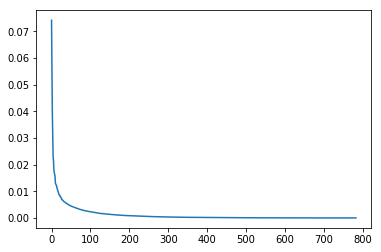

In [6]:
%matplotlib inline
##PCA explained variance ratio
plt.plot(pca.explained_variance_ratio_)

##Number of feature that is higher than 0.001
sum(pca.explained_variance_ratio_ > 0.001)

In [7]:
sum(pca.explained_variance_ratio_ [0:200])

0.90831058099568263

In [8]:
##Fitting pca with 200 features
pca = PCA(n_components=200)
train_pca = pca.fit_transform(train)
test_pca = pca.transform(test)

In [9]:
###################
###XGBOOST MODEL###
###################

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#model = XGBClassifier(max_depth=3,n_estimators=100,n_jobs=1)
#model.fit(train,train_target)

model2 = XGBClassifier()
model2.fit(train_pca,train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
#pred_train = model.predict(train)
pred2_train = model2.predict(train_pca)

#pred_test = model.predict(test)
pred2_test = model2.predict(test_pca)

In [22]:
print("Accuracy for Different Dataset")
print("Training Accuracy")
print(sum(pred2_train == train_target)/len(pred2_train))
print("Testing Accuracy")
print(sum(pred2_test == test_target)/len(pred2_test))

Accuracy for Different Dataset
Training Accuracy
0.84441182243
Testing Accuracy
0.842108862754


In [12]:
##Save Model
import pickle

#pickle.dump(model,open("model1.pickle.dat", "wb"))
pickle.dump(model2,open("model2.pickle.dat", "wb"))



In [ ]:
##Load Model
#loaded_model = pickle.load(open("model1.pickle.dat", "rb"))
#loaded_model = pickle.load(open("model2.pickle.dat", "rb"))


In [ ]:
np.savetxt("pred_train",pred_train, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
np.savetxt("pred2_train",pred2_train, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
np.savetxt("pred_test",pred_test, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
np.savetxt("pred2_test",pred2_test, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')


In [29]:
np.savetxt("train_target",train_target, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
np.savetxt("test_target",test_target, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')